# <font color='#d50283'>IT Academy - Data Science Itinerary</font>
## Sprint 4 - Graphic Visualization of a Data set
### Assignment by: Kat Weissman

#### Python Learning Objectives:
- Exploratory Analaysis
- Dataframes
- Reporting

*Recommended learning resources:*
- *W3 Schools Matplot Lib Tutorial: https://www.w3schools.com/python/matplotlib_getting_started.asp*
- *Pyplot Tutorial: https://matplotlib.org/stable/tutorials/introductory/pyplot.html*
- *Matplot Lib Gallery: https://matplotlib.org/stable/gallery/index.html*
- *Overview of Seaborn: https://seaborn.pydata.org/tutorial/function_overview.html*
- *Seaborn Gallery: https://seaborn.pydata.org/examples/index.html*


### Exercise 1
Graphically summarize the date set DelayedFlights.csv

Create at least one graph for:

- A categorical variable (UniqueCarrier)
- A numeric variable (ArrDelay)
- A numeric and a categorical variable (ArrDelay and UniqueCarrier)
- Two numeric variables (ArrDelay and DepDelay)
- Three variables (ArrDelay, DepDelay and UniqueCarrier)
- More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier).

In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Read data
df = pd.read_csv('/Users/kat/Library/Mobile Documents/com~apple~CloudDocs/IT Academy/Data Science Itinerary/Sprint 3 - Data Structures/data_delayed_flights/DelayedFlights.csv')
#Choose columns
airline_df = df[['Month','DayofMonth','DayOfWeek','UniqueCarrier','FlightNum','AirTime','ArrDelay',\
                          'DepDelay','Origin','Dest','Distance','Cancelled','Diverted']].copy()

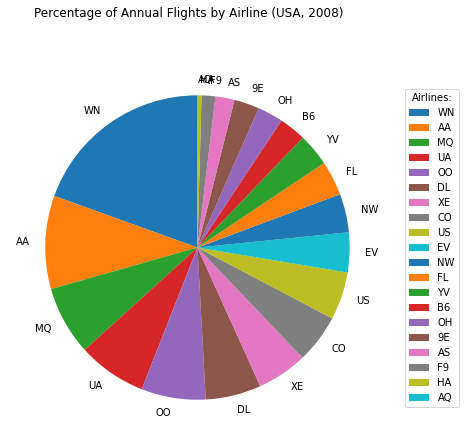

In [3]:
#Create pie chart for Unique Carriers: categorical variable
airlines_flights = airline_df.UniqueCarrier.value_counts()
airlines_ratio = airline_df.UniqueCarrier.value_counts(normalize=True)

y = airlines_ratio.values
mylabels = airlines_ratio.index

fig = plt.figure(figsize=(10,7))
plt.pie(y, labels = mylabels, startangle = 90)
plt.legend(title = "Airlines:",loc="right",bbox_to_anchor=(1.2, 0.5))
plt.suptitle('Percentage of Annual Flights by Airline (USA, 2008)')

plt.savefig('piechart.png') #must be called before plt.show()

plt.show() 


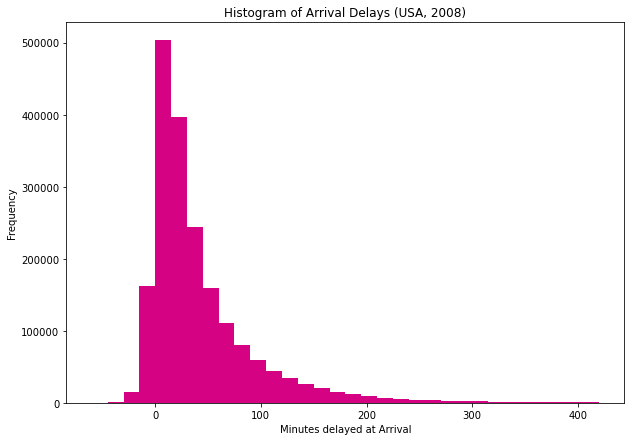

In [4]:
#Create a histogram to show frequency of Arrival Delays: a numeric variable
x = airline_df.ArrDelay

#histogram bins are intervals of 15 minutes between 1 hour early and 7 hours delayed
fig = plt.figure(figsize=(10,7))
plt.hist(x,bins=32,range=(-60,420),color='#d50283')
plt.xlabel('Minutes delayed at Arrival')
plt.ylabel('Frequency')
plt.title('Histogram of Arrival Delays (USA, 2008)')

plt.savefig('histogram.png')

plt.show() 


From this histogram, we can see that the distribution of arrival delays appears to follow a poisson distribution, and the arrival delay starts to exponentially decrease after a peak of arriving up to 15 minutes late.

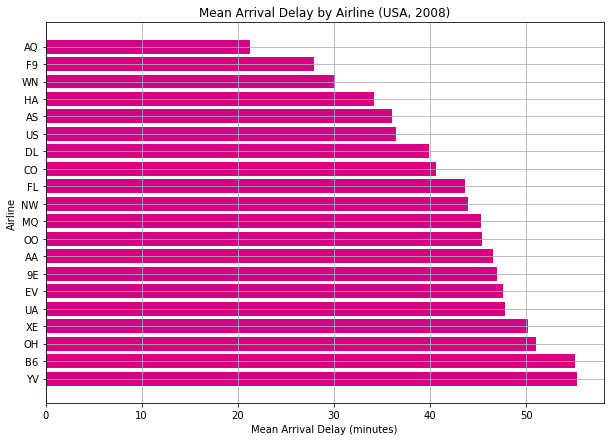

In [5]:
#A numeric and a categorical variable (ArrDelay and UniqueCarrier)
carrier_arrdelay_df = airline_df.ArrDelay.groupby(airline_df.UniqueCarrier).mean()
carrier_arrdelay_df = carrier_arrdelay_df.sort_values(ascending=False)
carrier_arrdelay_df

#Bar plot of average arrival delay in minutes  per Unique Carrier
fig = plt.figure(figsize = (10, 7))
plt.barh(carrier_arrdelay_df.index, carrier_arrdelay_df, color = '#d50283')
plt.ylabel('Airline')
plt.xlabel('Mean Arrival Delay (minutes)')
plt.title('Mean Arrival Delay by Airline (USA, 2008)')
plt.grid()

plt.savefig('horizontalbarchart.png')

plt.show()


The carriers with the best performance are AQ - 9 Air Co Ltd, F9 - Frontier Airlines, and WN - Southwest Airlines.

The carriers with the worst performance are YV - Mesa Airlines, B6 - Jetblue Airways, and OH - PSA Airlines.

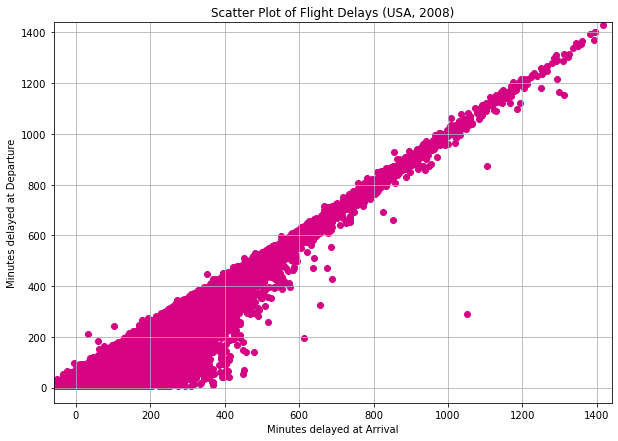

In [6]:
#Scatter Plot of Arrival & Departure Delays: two numeric variables
x = airline_df.ArrDelay
y = airline_df.DepDelay

fig = plt.figure(figsize=(10,7))
plt.scatter(x, y, color = '#d50283')
#Limits of plot range from one hour early to 24 hours delayed
plt.xlim(-60, 1440)
plt.ylim(-60, 1440)
plt.xlabel('Minutes delayed at Arrival')
plt.ylabel('Minutes delayed at Departure')
plt.title('Scatter Plot of Flight Delays (USA, 2008)')
plt.grid()

plt.savefig('scatterplot.png')

plt.show()


From the scatter plot, we can see that the Departure Delays and Arrival Delays are closely correlated and have a strong linear relatinoship as expected. There are some outliers and possibly messy data that appears to affect that plot. Many flights appear to arrive with a delay of around 400 minutes even though they do not experience a long departure delay.

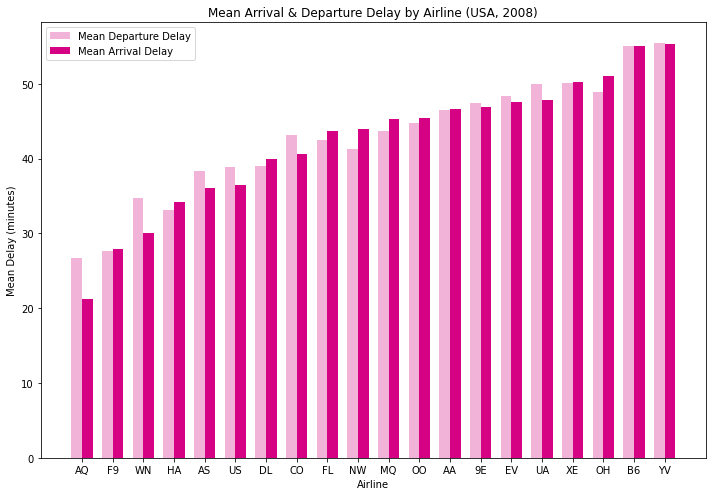

In [7]:
#Three variables (ArrDelay, DepDelay and UniqueCarrier)
carrier_delay_df = airline_df[['DepDelay','ArrDelay']].groupby(airline_df.UniqueCarrier).mean()
carrier_delay_df = carrier_delay_df.sort_values('ArrDelay')
carrier_delay_df

#Grouped Bar Chart of average delay in minutes  per Unique Carrier
labels = carrier_delay_df.index
arr_means = carrier_delay_df.ArrDelay
dep_means = carrier_delay_df.DepDelay

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, dep_means, width, label='Mean Departure Delay', color= '#f2b3d9')
rects2 = ax.bar(x + width/2, arr_means, width, label='Mean Arrival Delay', color='#d50283')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Delay (minutes)')
ax.set_xlabel('Airline')
ax.set_title('Mean Arrival & Departure Delay by Airline (USA, 2008)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.savefig('twogroupbarchart.png')

plt.show()



For most airlines, the mean departure delay is very close to the mean arrival delay. In some cases, like airlines AQ and WN, we can see that the flights may be able to recover some of the time delay during the flight since they have a lower mean for arrival delay than departure delay.

Reference for creating grouped bar charts: https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

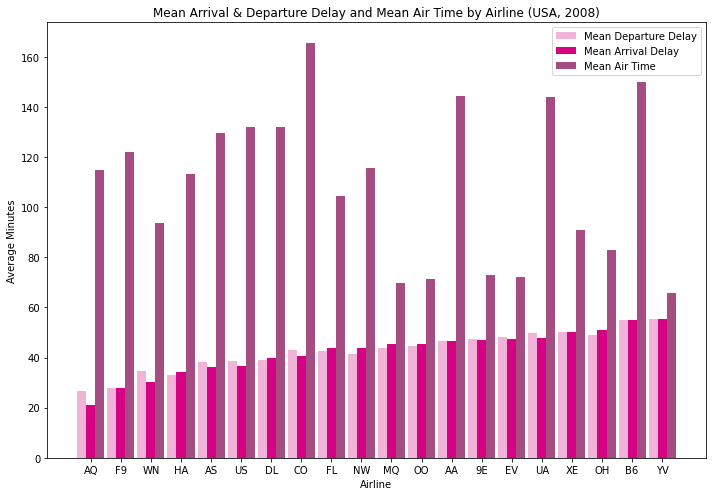

In [8]:
#More than three variables (ArrDelay, DepDelay, AirTime and UniqueCarrier).
carrier_time_df = airline_df[['DepDelay','ArrDelay','AirTime']].groupby(airline_df.UniqueCarrier).mean()
carrier_time_df = carrier_time_df.sort_values('ArrDelay')
carrier_time_df

#Grouped Bar Chart of average delay in minutes and average airtime per Unique Carrier
labels = carrier_time_df.index
arr_means = carrier_time_df.ArrDelay
dep_means = carrier_time_df.DepDelay
air_means = carrier_time_df.AirTime

x = np.arange(len(labels))  # the label locations
width = 0.9  # the width of the bars

fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/3, dep_means, width/3, label='Mean Departure Delay', color='#f2b3d9')
rects2 = ax.bar(x , arr_means, width/3, label='Mean Arrival Delay',color='#d50283')
rects3 = ax.bar(x + width/3, air_means, width/3, label='Mean Air Time', color='#a54d83')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Average Minutes')
ax.set_xlabel('Airline')
ax.set_title('Mean Arrival & Departure Delay and Mean Air Time by Airline (USA, 2008)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.savefig('threegroupbarchart.png')

plt.show()


The chart is not very asthetically pleasing with these three variables, but we can still interpret some interesting results from this graph. In the case of airlines MQ, OO, 9E, EV, and YV, the average delays are very similar to the average flight time. This would make a frustrating experience for travelers because a large percentage of their travel time would be spent waiting at the airport. A delay that is significantly shorter than the flying time is not as frustrating for the traveler, which is the case with the airine CO.

### Exercise 2
Export graphics as images or as html.

Lines have been added in code blocks above to save the figures as .png using plt.savefig('filename.png') before the plt.show() command.

### Exercise 3
Integrate the graphical visualizations, in task 5, of Sprint 3.

A new version of the Sprint 3 Task 5 notebook has been created to integrate graphics. It will be uploaded to github in both repositories.

Sprint 4 Task 1: https://github.com/KatBCN/visualitzacio_exploratoria

Sprint 3 Task 5: https://github.com/KatBCN/estructures_Dataframe

